<a href="https://colab.research.google.com/github/letaanindyariyadi/AnalisisBigData-LetaAnindya-202010370311231/blob/main/Tugas_1_Big_Data_202010370311231_Leta_Anindya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assessments

In [180]:
# Membaca file
df = pd.read_csv('assessments.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [181]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [182]:
# Menangani missing values secara keseluruhan menggunakan perulangan for
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [183]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Rows and Columns:
(206, 6)

Column Names:
Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight'],
      dtype='object')

Null Values %:
code_module          0.0
code_presentation    0.0
id_assessment        0.0
assessment_type      0.0
date                 0.0
weight               0.0
dtype: float64


In [184]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

3 Categorical features:
['code_module', 'code_presentation', 'assessment_type']

2 float64 features:
['date', 'weight']

1 int features:
['id_assessment']

2 numpy.number features::
['date', 'weight']


# Courses

In [223]:
# Membaca file
df = pd.read_csv('courses.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [224]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [225]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

Rows and Columns:
(22, 3)

Column Names:
Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')

Null Values %:
code_module                   0.0
code_presentation             0.0
module_presentation_length    0.0
dtype: float64


In [226]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

2 Categorical features:
['code_module', 'code_presentation']

0 float64 features:
[]

1 int features:
['module_presentation_length']

0 numpy.number features::
[]


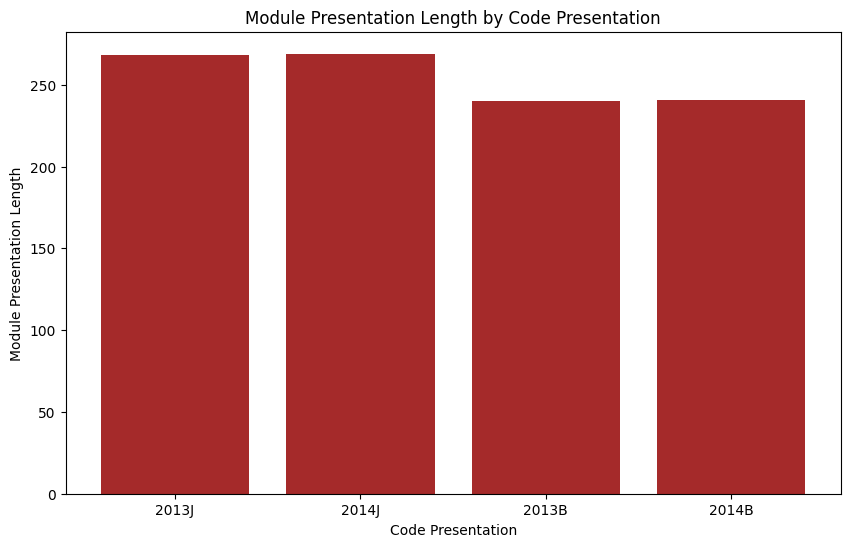

In [228]:
# Menampilkan grafik untuk distribusi panjang presentasi modul
plt.figure(figsize=(10, 6))
plt.bar(df['code_presentation'], df['module_presentation_length'], color='brown')
plt.xlabel('Code Presentation')
plt.ylabel('Module Presentation Length')
plt.title('Module Presentation Length by Code Presentation')
plt.show()

Grafik diatas menampilkan distribusi panjang presentasi modul. Dengan Code_presentasion tertinggi yaitu 2014J dan 2013J dengan module presentation lenght 275. Dan code presentation terendah yaitu pada 2013B dan 2014B yaitu dengan module presentation length hampir 250

# studentAssessments

In [189]:
# Membaca file
df = pd.read_csv('studentAssessment.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [190]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [191]:
# Menangani missing values secara keseluruhan menggunakan perulangan for
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [192]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

Rows and Columns:
(173912, 5)

Column Names:
Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')

Null Values %:
id_assessment     0.0
id_student        0.0
date_submitted    0.0
is_banked         0.0
score             0.0
dtype: float64


In [193]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

0 Categorical features:
[]

1 float64 features:
['score']

4 int features:
['id_assessment', 'id_student', 'date_submitted', 'is_banked']

1 numpy.number features::
['score']


# studentInfo

In [215]:
# Membaca file
df = pd.read_csv('studentInfo.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [216]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [217]:
# Menangani missing values secara keseluruhan menggunakan perulangan for
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [218]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Rows and Columns:
(32593, 12)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

Null Values %:
code_module             0.0
code_presentation       0.0
id_student              0.0
gender                  0.0
region                  0.0
highest_education       0.0
imd_band                0.0
age_band                0.0
num_of_prev_attempts    0.0
studied_credits         0.0
disability              0.0


In [219]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

9 Categorical features:
['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']

0 float64 features:
[]

3 int features:
['id_student', 'num_of_prev_attempts', 'studied_credits']

0 numpy.number features::
[]


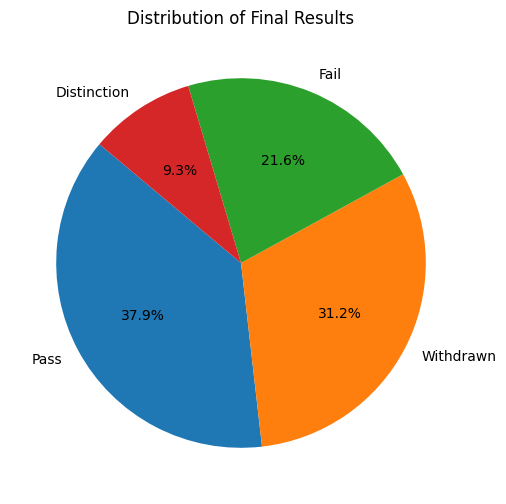

In [222]:
# Menampilkan grafik untuk distribusi final_result
final_result_counts = df['final_result'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(final_result_counts, labels=final_result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Final Results')
plt.show()

adi, grafik ini memberikan gambaran visual tentang sebaran nilai dalam kolom 'final_result' pada DataFrame . Pada data StudentInfo didapatkan distribution  of final results dengan withdrawn sebesat 31,2%, Pass 37,9%, Distriction 9,3%, dan Fail 21,6 %

# studentRegistration

In [199]:
# Membaca file
df = pd.read_csv('studentRegistration.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [200]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [201]:
# Menangani missing values secara keseluruhan menggunakan perulangan for
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [202]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

Rows and Columns:
(32593, 5)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')

Null Values %:
code_module            0.0
code_presentation      0.0
id_student             0.0
date_registration      0.0
date_unregistration    0.0
dtype: float64


In [203]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

2 Categorical features:
['code_module', 'code_presentation']

2 float64 features:
['date_registration', 'date_unregistration']

1 int features:
['id_student']

2 numpy.number features::
['date_registration', 'date_unregistration']


# studentVle

In [204]:
# Membaca file
df = pd.read_csv('studentVle.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


In [205]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98865 entries, 0 to 98864
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        98865 non-null  object 
 1   code_presentation  98865 non-null  object 
 2   id_student         98864 non-null  float64
 3   id_site            98864 non-null  float64
 4   date               98864 non-null  float64
 5   sum_click          98864 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.5+ MB


In [206]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
code_module           object
code_presentation     object
id_student           float64
id_site              float64
date                 float64
sum_click            float64
dtype: object

Rows and Columns:
(98865, 6)

Column Names:
Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')

Null Values %:
code_module          0.00000
code_presentation    0.00000
id_student           0.00001
id_site              0.00001
date                 0.00001
sum_click            0.00001
dtype: float64


In [207]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

2 Categorical features:
['code_module', 'code_presentation']

4 float64 features:
['id_student', 'id_site', 'date', 'sum_click']

0 int features:
[]

4 numpy.number features::
['id_student', 'id_site', 'date', 'sum_click']


# Vle

In [208]:
# Membaca file
df = pd.read_csv('vle.csv')

# Menampilkan 5 data urutan paling atas
df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [209]:
# Menampilkan metadata dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [210]:
# Menangani missing values secara keseluruhan menggunakan perulangan for
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print(df.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64


In [211]:
# Mengecek komponen-komponen dataset
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")

Data Types:
id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

Rows and Columns:
(6364, 6)

Column Names:
Index(['id_site', 'code_module', 'code_presentation', 'activity_type',
       'week_from', 'week_to'],
      dtype='object')

Null Values %:
id_site              0.0
code_module          0.0
code_presentation    0.0
activity_type        0.0
week_from            0.0
week_to              0.0
dtype: float64


In [212]:
# Identifikasi feature berdasarkan tipe datanya
temp = (df.dtypes == 'object')
cat_cols = list(temp[temp].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

temp = (df.dtypes == 'float64')
float64_cols = list(temp[temp].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

temp = (df.dtypes == 'int64')
int64_cols = list(temp[temp].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")

temp = (df.dtypes == np.number)
num_cols = list(temp[temp].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")

3 Categorical features:
['code_module', 'code_presentation', 'activity_type']

2 float64 features:
['week_from', 'week_to']

1 int features:
['id_site']

2 numpy.number features::
['week_from', 'week_to']
